In [1]:
import tensorflow as tf


In [2]:
from tensorflow.keras.datasets import cifar10

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.utils import to_categorical
import numpy as np
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
(train_X,train_y),(test_X,test_y) = cifar10.load_data()

170498071/170498071 [==============================] - 3s 0us/step


In [7]:
train_X = train_X.astype('float32') / 255.0
test_X = test_X.astype('float32') / 255.0

In [9]:
num_classes = 10
train_y = to_categorical(train_y, num_classes)
test_y = to_categorical(test_y, num_classes)

In [11]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),  # Adding dropout for regularization
    Dense(num_classes, activation='softmax')
])

In [12]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history = model.fit(train_X, train_y, epochs=20, batch_size=128, validation_data=(test_X, test_y))

Epoch 1/20
391/391 [==============================] - 62s 156ms/step - loss: 1.7788 - accuracy: 0.3430 - val_loss: 1.4349 - val_accuracy: 0.4758
Epoch 2/20
391/391 [==============================] - 61s 157ms/step - loss: 1.4119 - accuracy: 0.4909 - val_loss: 1.2244 - val_accuracy: 0.5601
Epoch 3/20
391/391 [==============================] - 61s 155ms/step - loss: 1.2559 - accuracy: 0.5554 - val_loss: 1.1292 - val_accuracy: 0.5982
Epoch 4/20
391/391 [==============================] - 63s 160ms/step - loss: 1.1456 - accuracy: 0.5990 - val_loss: 1.1002 - val_accuracy: 0.6090
Epoch 5/20
391/391 [==============================] - 60s 154ms/step - loss: 1.0554 - accuracy: 0.6316 - val_loss: 0.9891 - val_accuracy: 0.6551
Epoch 6/20
391/391 [==============================] - 60s 154ms/step - loss: 0.9841 - accuracy: 0.6569 - val_loss: 0.9066 - val_accuracy: 0.6897
Epoch 7/20
391/391 [==============================] - 60s 154ms/step - loss: 0.9214 - accuracy: 0.6799 - val_loss: 0.9164 - val_ac

In [14]:
pred_y = model.predict(test_X)

313/313 [==============================] - 7s 22ms/step


In [15]:
predicted_labels = np.argmax(pred_y, axis=1)

In [18]:
y_test = np.argmax(test_y, axis=1)

In [20]:
y_test

array([3, 8, 8, ..., 5, 1, 7])

In [21]:
conf_matrix = confusion_matrix(y_test, predicted_labels)

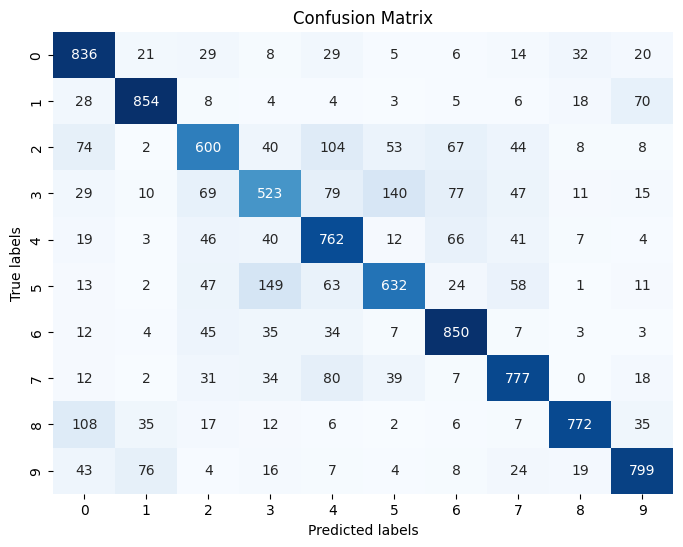

In [22]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()